In [1]:
import os
import sys
from pathlib import Path
ROOT = Path().resolve().parent
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf, Peaking, HighShelf

In [2]:
fr = FrequencyResponse.read_from_csv(ROOT.joinpath('Harman in-ear 2019.csv'))

low_shelf = LowShelf(fr.frequency, 44100, fc=105, q=0.7, gain=9)
fr.raw -= low_shelf.fr
ix200 = np.argmin(np.abs(fr.frequency - 200))
ix300 = np.argmin(np.abs(fr.frequency - 300))
floor_ix = np.argmin(fr.raw[ix200:ix300]) + ix200
fr.raw[:floor_ix] = fr.raw[floor_ix]

ear_degain = Peaking(fr.frequency, 44100, fc=3766, q=0.63, gain=-2)
fr.raw += ear_degain.fr

fr.center()
fr.name = 'AutoEq in-ear'

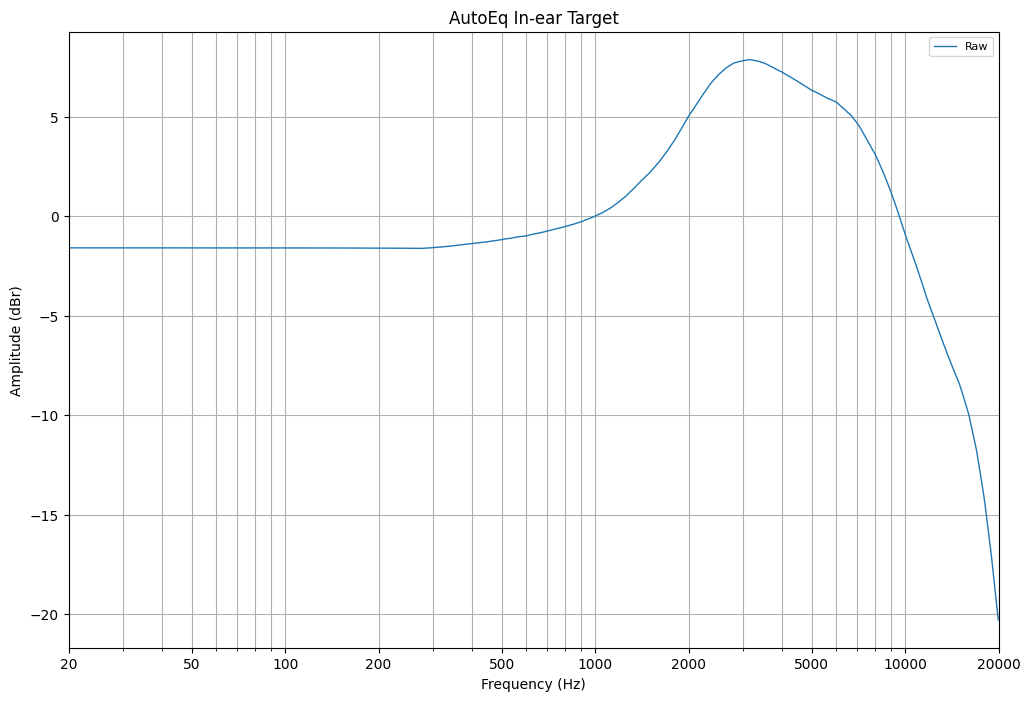

In [3]:
fr.plot_graph(color='C0')
plt.show()

In [ ]:
for i in range(len(fr.frequency) - 90, len(fr.frequency)):
    print(i, fr.frequency[i], fr.raw[i], fr.raw[i] - fr.raw[i-1])

In [49]:
for i in range(614, 695):
    fr.raw[i] = fr.raw[i-1] - 0.175

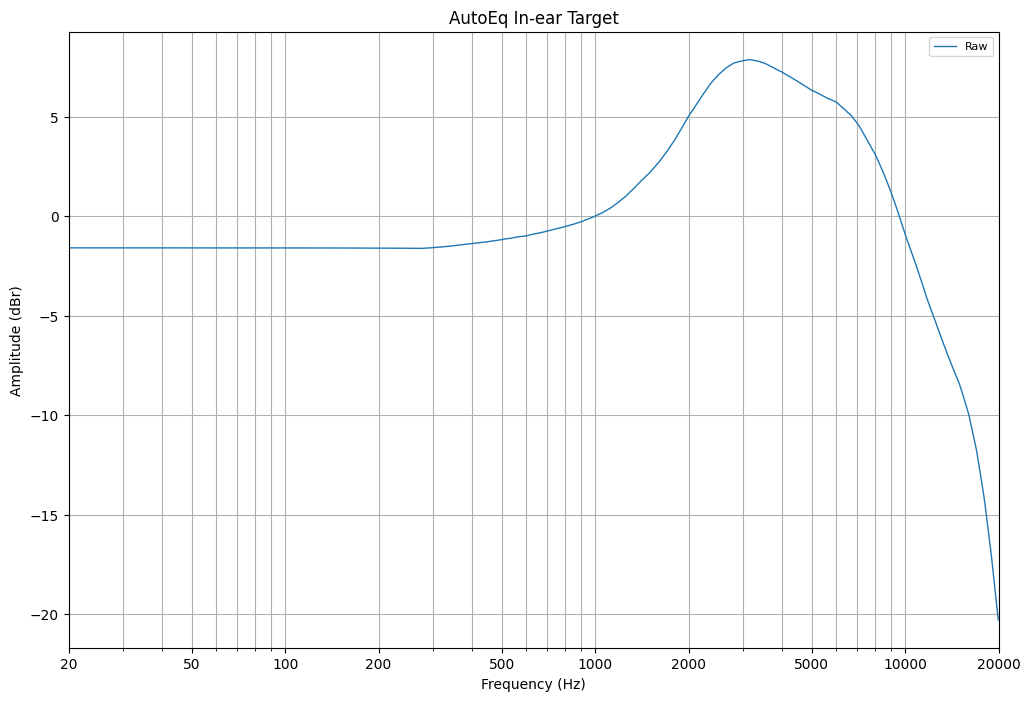

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'AutoEq In-ear Target'}, xlabel='Frequency (Hz)', ylabel='Amplitude (dBr)'>)

In [4]:
fr.plot_graph(color='C0', file_path=ROOT.joinpath('AutoEq in-ear.png'))
#fr.plot_graph(color='C0')

In [5]:
fr.write_to_csv(ROOT.joinpath('AutoEq in-ear.csv'))